# I. Modélisation statistique

In [18]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [19]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,...,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,...,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,...,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,...,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,...,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [20]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [21]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [22]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [23]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [24]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [25]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [26]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [27]:
np.unique(y)

array([0, 1], dtype=int64)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [29]:
X_train.shape, y_train.shape

((951, 31), (951,))

In [30]:
X_test.shape, y_test.shape

((238, 31), (238,))

## I.2.1. Régression logistique

### A) Construction du modèle

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [31]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

etapes_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression(penalty="none")), # Régression logistique
        ]

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression(penalty="none")), # Régression logistique
        ]

modele_reg_log_smote  = Pipeline(steps=etapes_smote) # Création du pipeline
modele_reg_log_oversampler  = Pipeline(steps=etapes_oversampler) # Création du pipeline

On entraîne le modèle sur les données pour estimer les coefficients. 

In [32]:
modele_reg_log_smote.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression(penalty='none'))])

In [33]:
modele_reg_log_oversampler.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log', LogisticRegression(penalty='none'))])

On cherche à prédire de nouvelles données grâce aux données test

In [36]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

In [37]:
y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

#### B) Mesure de la performance

Nous allons maintenant évaluer la performance de notre modèle

In [69]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_smote }")
print(f"AUC-PR: {auc_pr_reg_log_smote }")
print(f"Log Loss: {log_loss_value_reg_log_smote }")
print(f"Precision: {precision_reg_log_smote }")
print(f"Recall: {recall_reg_log_smote }")
print(f"F1 Score: {f1_reg_log_smote }")
print(f"MCC: {mcc_reg_log_smote }")
print(f"Balanced Accuracy: {balanced_acc_reg_log_smote }")
print(f"Specificity: {specificity_reg_log_smote }")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_smote }")

AUC-ROC: 0.6669096209912537
AUC-PR: 0.28453294743031965
Log Loss: 0.6510142186577208
Precision: 0.26881720430107525
Recall: 0.5952380952380952
F1 Score: 0.37037037037037035
MCC: 0.19400044905203764
Balanced Accuracy: 0.6241496598639455
Specificity: 0.6530612244897959
Cohen's Kappa: 0.16810592976396088


In [71]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_oversampler}")
print(f"AUC-PR: {auc_pr_reg_log_oversampler}")
print(f"Log Loss: {log_loss_value_reg_log_oversampler}")
print(f"Precision: {precision_reg_log_oversampler}")
print(f"Recall: {recall_reg_log_oversampler}")
print(f"F1 Score: {f1_reg_log_oversampler}")
print(f"MCC: {mcc_reg_log_oversampler}")
print(f"Balanced Accuracy: {balanced_acc_reg_log_oversampler}")
print(f"Specificity: {specificity_reg_log_oversampler}")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_oversampler}")

AUC-ROC: 0.6856171039844509
AUC-PR: 0.2780007495354276
Log Loss: 0.6500965728852951
Precision: 0.2903225806451613
Recall: 0.6428571428571429
F1 Score: 0.4
MCC: 0.23917863581758064
Balanced Accuracy: 0.653061224489796
Specificity: 0.6632653061224489
Cohen's Kappa: 0.20725388601036276


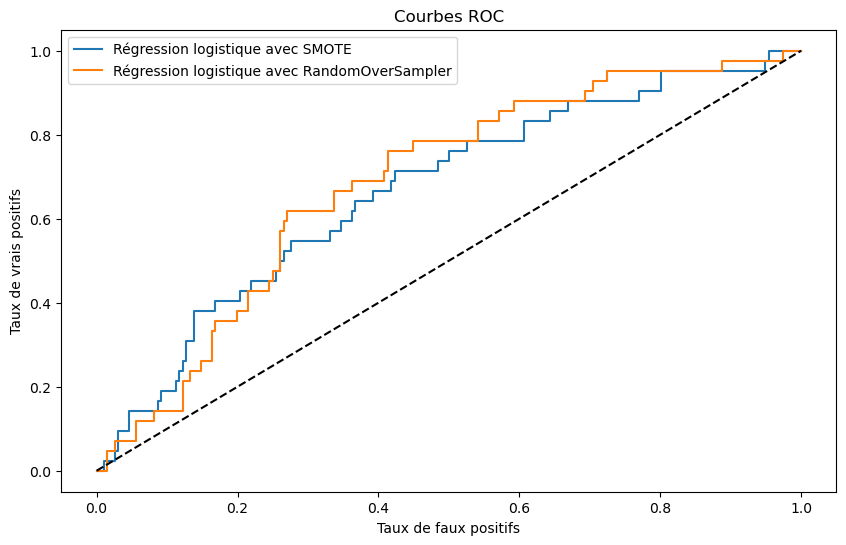

In [72]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

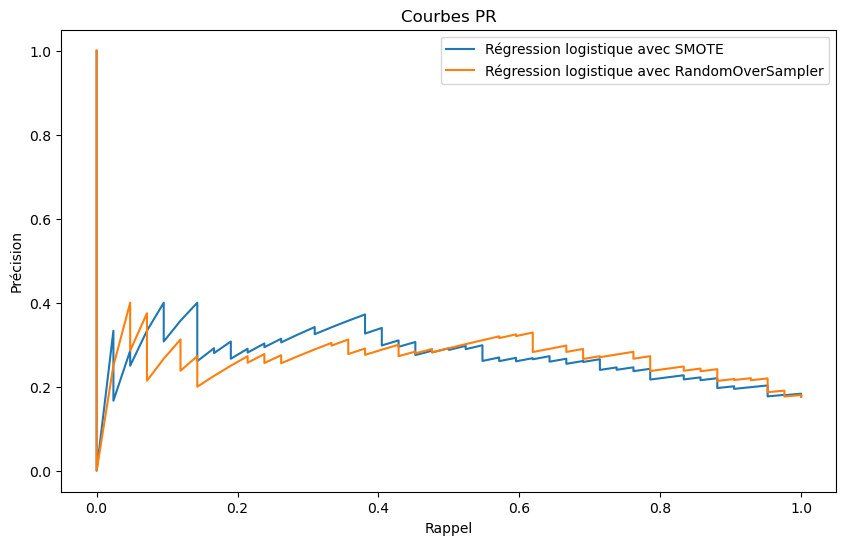

In [73]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [75]:
# Résultats 

resultats = pd.DataFrame({
    "AUC-ROC": [auc_roc_reg_log_smote, auc_roc_reg_log_oversampler],
    "AUC-PR": [auc_pr_reg_log_smote, auc_pr_reg_log_oversampler],
    "Log Loss": [log_loss_value_reg_log_smote, log_loss_value_reg_log_oversampler],
    "Précision": [precision_reg_log_smote, precision_reg_log_oversampler],
    "Rappel": [recall_reg_log_smote, recall_reg_log_oversampler],
    "F1 Score": [f1_reg_log_smote, f1_reg_log_oversampler],
    "MCC": [mcc_reg_log_smote, mcc_reg_log_oversampler],
    "Accuracy": [balanced_acc_reg_log_smote, balanced_acc_reg_log_oversampler],
    "Spécificité": [specificity_reg_log_smote, specificity_reg_log_oversampler],
    "Kappa de Cohen": [cohen_kappa_reg_log_smote, cohen_kappa_reg_log_oversampler]
}, index=["Reg log - SMOTE", "Reg log - RandomOverSampler"])

resultats

,AUC-ROC,AUC-PR,Log Loss,Précision,Rappel,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Reg log - SMOTE,0.666910,0.284533,0.651014,"[0.17647058823529413, 0.17721518987341772, 0.1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.37037,0.194000,0.624150,0.653061,0.168106
Reg log - RandomOverSampler,0.685617,0.278001,0.650097,"[0.17647058823529413, 0.17721518987341772, 0.1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9761904761904...",0.40000,0.239179,0.653061,0.663265,0.207254


Commentaire sur le tableau : 

1. AUC-ROC (Area Under the ROC Curve)

L'AUC-ROC pour le modèle avec RandomOverSampler est légèrement supérieur, ce qui indique une meilleure capacité à distinguer entre les classes positives et négatives.

2. AUC-PR (Area Under the Precision-Recall Curve)

L'AUC-PR pour le modèle avec SMOTE est légèrement supérieur. Ceci est important car AUC-PR est plus informatif pour les données déséquilibrées, indiquant que SMOTE gère mieux le compromis entre précision et rappel.

3. Log Loss

Les valeurs de Log Loss sont très similaires, avec une légère préférence pour RandomOverSampler. Log Loss pénalise les mauvaises prédictions probabilistes, donc une valeur plus basse est préférable.

4. Précision

Les précisions sont identiques et très faibles dans les deux cas. Cela indique que la proportion de vraies positives parmi les prédictions positives est très faible, ce qui est typique avec des données très déséquilibrées.

5. Rappel

Le rappel est parfait (1.0) pour SMOTE et presque parfait pour RandomOverSampler. Cela indique que presque toutes les instances positives sont correctement identifiées par les deux modèles.

6. F1 Score

Le modèle avec RandomOverSampler a un F1 score légèrement supérieur, ce qui montre un meilleur équilibre entre précision et rappel.

7. MCC (Matthews Correlation Coefficient)

Le modèle avec RandomOverSampler a un MCC plus élevé, ce qui indique une meilleure performance globale.

8. Accuracy

La précision est légèrement meilleure pour RandomOverSampler. Cependant, l'accuracy n'est pas toujours informative pour des données déséquilibrées.

9. Spécificité

La spécificité est un peu meilleure pour RandomOverSampler, ce qui signifie qu'il identifie mieux les instances négatives.

10. Kappa de Cohen

Le modèle avec RandomOverSampler a un Kappa de Cohen supérieur, ce qui indique un meilleur accord entre les prédictions et les classes réelles.

Globalement, bien que les deux modèles aient des performances similaires, le modèle utilisant RandomOverSampler présente de meilleures performances sur plusieurs métriques importantes, telles que l'AUC-ROC, le F1 score, le MCC, et le Kappa de Cohen. Ces résultats suggèrent que le RandomOverSampler pourrait être légèrement plus efficace que SMOTE dans ce contexte spécifique de données déséquilibrées.

#### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none').

In [31]:
# Ajustement du modèle

from sklearn.model_selection import GridSearchCV

# Définir les paramètres de la grille
grille_param = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation
    'reg_log__solver': ['liblinear', 'lbfgs', 'saga'], 
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'none'] # Type de régularisation
}

# Création du GridSearchCV
grid_search = GridSearchCV(modele_reg_log, grille_param, cv=5)

# Entraînement
grid_search.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:117

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('reg_log', LogisticRegression())]),
             param_grid={'reg_log__C': [0.01, 0.1, 1, 10, 100],
                         'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'reg_log__solver': ['liblinear', 'lbfgs', 'saga']})

In [34]:
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

Meilleurs paramètres : {'reg_log__C': 0.01, 'reg_log__penalty': 'l1', 'reg_log__solver': 'liblinear'}


In [36]:
# Meilleur modèle
best_model_reg_log = grid_search.best_estimator_
best_model_reg_log

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [40]:
# Prévisions
y_proba_reg_log_cv = modele_reg_log.predict_proba(X_test)[:, 1]

#### D) Mesure de la performance du modèle optimisé

In [41]:
auc_roc = roc_auc_score(y_test, y_proba_reg_log_cv)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.6755344995140913


### I.2.2. Abres de décision

#### A) Construction du modèle

In [29]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_arbre = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

modele_arbre = Pipeline(steps=etapes_arbre) # Création du pipeline

modele_arbre.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre', DecisionTreeClassifier())])

In [30]:
y_pred_arbre = modele_arbre.predict(X_test)

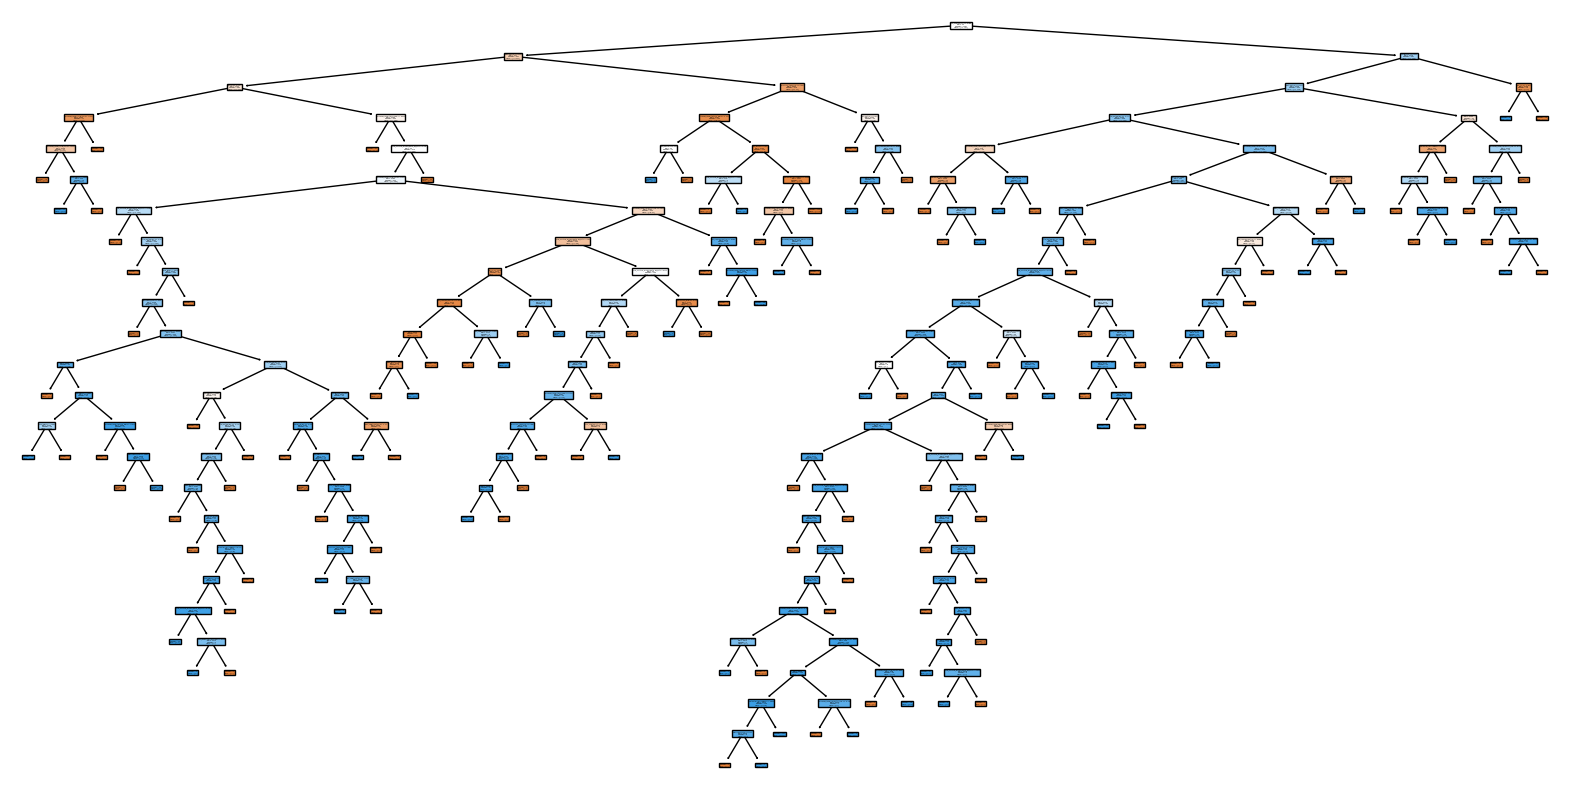

In [31]:
# Représentation graphique de l'arbre de décision

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modele_arbre.named_steps['arbre'], filled=True, feature_names=donnees.columns)
plt.show()

#### B) Mesure de la performance

In [32]:
score_arbre = modele_arbre.score(X_test, y_test)
print("Le score du modèle est : ", score_arbre)

Le score du modèle est :  0.6974789915966386


In [33]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_arbre = confusion_matrix(y_test, y_pred_arbre)
print("La matrice de confusion est : \n", mat_conf_arbre)

La matrice de confusion est : 
 [[154  42]
 [ 30  12]]


Text(0.5, 427.9555555555555, 'valeur prédite')

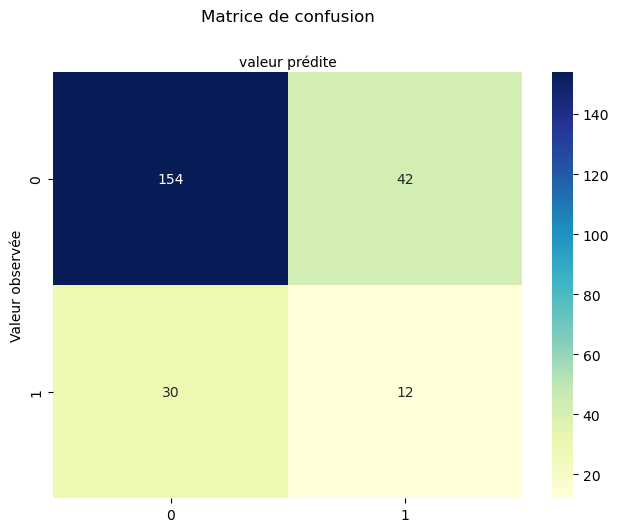

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_arbre), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

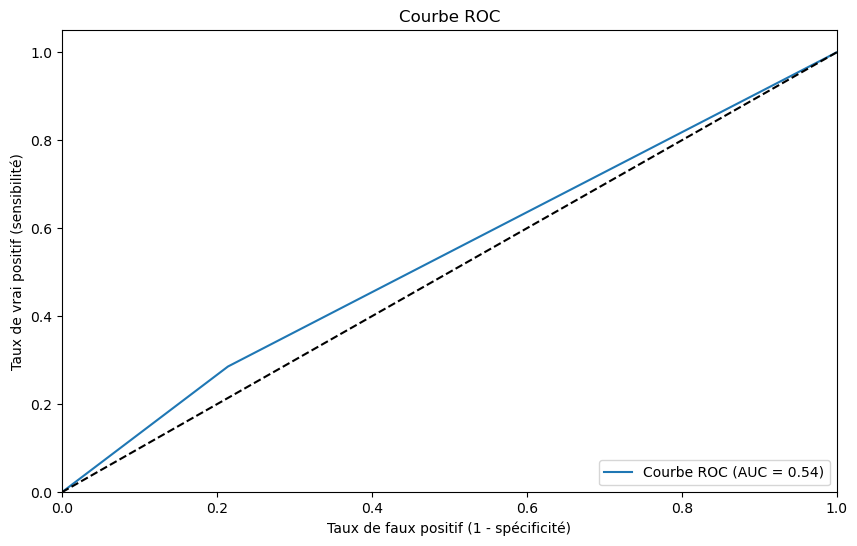

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_arbre= modele_arbre.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_arbre) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_arbre = roc_auc_score(y_test, y_pred_arbre)
score_auc_arbre

0.5357142857142857

In [37]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_arbre = precision_score(y_test, y_pred_arbre)
print("Precision:", precision_arbre)

Precision: 0.2222222222222222


In [38]:
from sklearn.metrics import recall_score

recall_arbre = recall_score(y_test, y_pred_arbre)
print("Recall:", recall_arbre)

Recall: 0.2857142857142857


In [39]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_arbre= f1_score(y_test, y_pred_arbre)
print("F1-Score:", f1_arbre)

F1-Score: 0.25


In [40]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_arbre) 
print("F1-Score:", f1_arbre)

Modèle de forêts aléatoires 

Score AUC: 0.5357142857142857
F1-Score: 0.25


#### C) Ajustement des hyperparamètres

In [41]:
# Ajustement des hyperparamètres de l'arbre de décision

from sklearn.model_selection import GridSearchCV

param_grid = {'arbre__max_depth': np.arange(1, 10), # profondeur maximale de l'arbre
              'arbre__min_samples_leaf': np.arange(1, 10)}  # nombre minimal d'échantillons dans une feuille

best_modele_arbre = GridSearchCV(modele_arbre, param_grid, cv=5)

In [42]:
best_modele_arbre.fit(X_train, y_train) # Entraînement du modèle

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('oversampler', RandomOverSampler()),
                                       ('arbre', DecisionTreeClassifier())]),
             param_grid={'arbre__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'arbre__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [43]:
# Meilleurs hyperparamètres

print("Meilleurs hyperparamètres: ", best_modele_arbre.best_params_)
print('\n')
print("Meilleur score: ", best_modele_arbre.best_score_)
print("Meilleur estimateur: ", best_modele_arbre.best_estimator_)
print("Meilleur score sur l'ensemble de test: ", best_modele_arbre.score(X_test, y_test))

Meilleurs hyperparamètres:  {'arbre__max_depth': 9, 'arbre__min_samples_leaf': 1}


Meilleur score:  0.7014218793055937
Meilleur estimateur:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre', DecisionTreeClassifier(max_depth=9))])
Meilleur score sur l'ensemble de test:  0.6260504201680672


In [44]:
# Prédiction avec le modèle ajusté
y_pred_arbre_cv = best_modele_arbre.predict(X_test)

#### D) Mesure de la performance du modèle optimisé

In [45]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)
print("La matrice de confusion est : \n", mat_conf_arbre_cv)

La matrice de confusion est : 
 [[130  66]
 [ 23  19]]


Text(0.5, 427.9555555555555, 'valeur prédite')

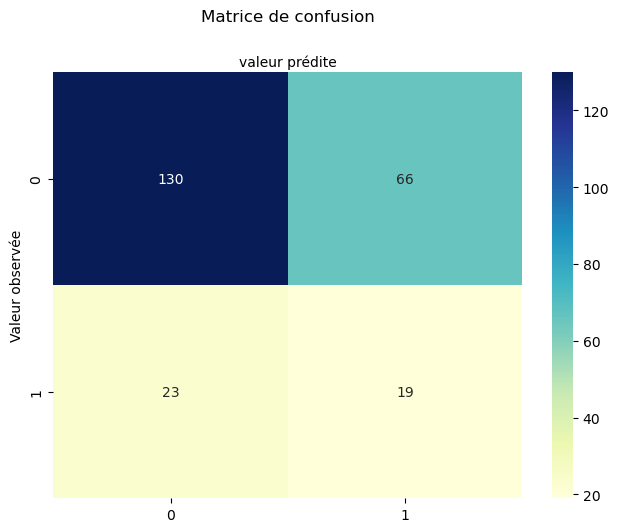

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_arbre_cv), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

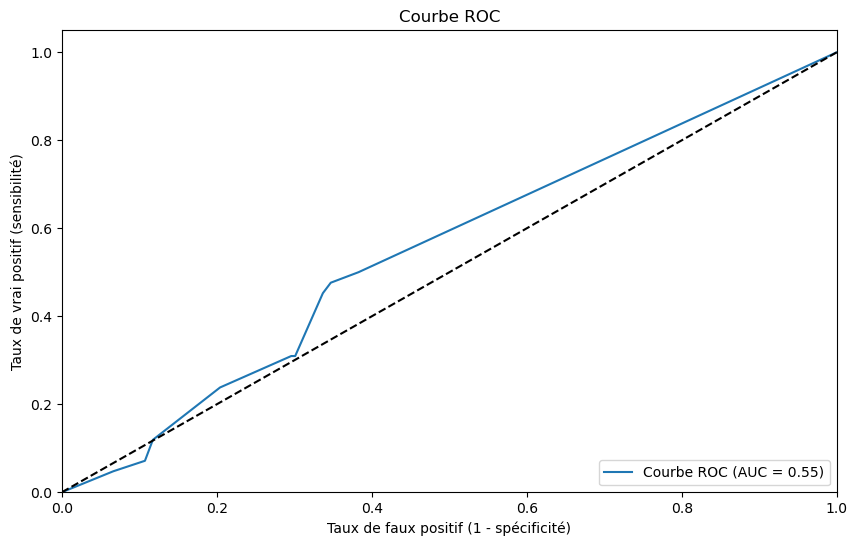

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_arbre_cv = best_modele_arbre.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_arbre_cv) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_arbre_cv = roc_auc_score(y_test, y_pred_arbre_cv)
score_auc_arbre_cv

0.5578231292517006

In [49]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
print("Precision:", precision_arbre_cv)

Precision: 0.2235294117647059


In [50]:
from sklearn.metrics import recall_score

recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
print("Recall:", recall_arbre_cv)

Recall: 0.4523809523809524


In [51]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
print("F1-Score:", f1_arbre_cv)

F1-Score: 0.2992125984251968


In [52]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_arbre_cv) 
print("F1-Score:", f1_arbre_cv)

Modèle de forêts aléatoires 

Score AUC: 0.5578231292517006
F1-Score: 0.2992125984251968


### I.2.3. Forêts Aléatoires 

#### A) Construction du modèle

In [53]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

etapes = ([
    ("std_scaler", StandardScaler()),
    ("undersampler", RandomOverSampler()),
    ("clf_forets", RandomForestClassifier())
])

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('clf_forets', RandomForestClassifier()), # Forets alétaoires 
        ]

model_random_forest = Pipeline(steps=etapes_smote)

model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_forets', RandomForestClassifier())])

In [54]:
y_pred_random_forest = model_random_forest.predict(X_test)

#### B) Mesure de la performance

In [55]:
score_random_forest = model_random_forest.score(X_test, y_test)
print("Le score du modèle est : ", score_random_forest)

Le score du modèle est :  0.7857142857142857


In [56]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_random_forest = confusion_matrix(y_test, y_pred_random_forest
                                          )
print("La matrice de confusion est : \n", mat_conf_random_forest)

La matrice de confusion est : 
 [[175  21]
 [ 30  12]]


Text(0.5, 427.9555555555555, 'valeur prédite')

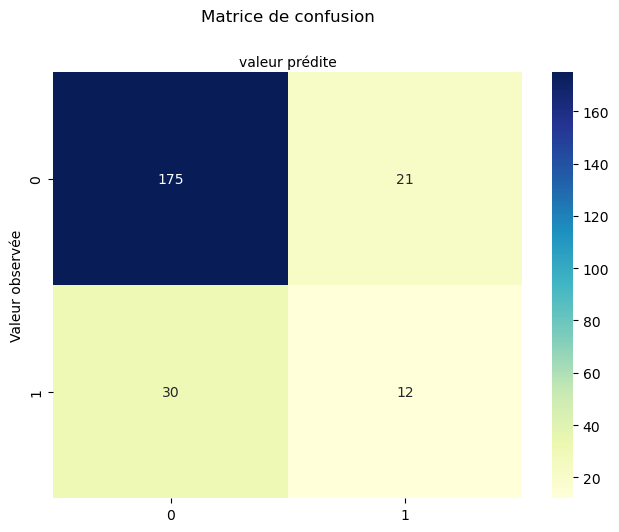

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

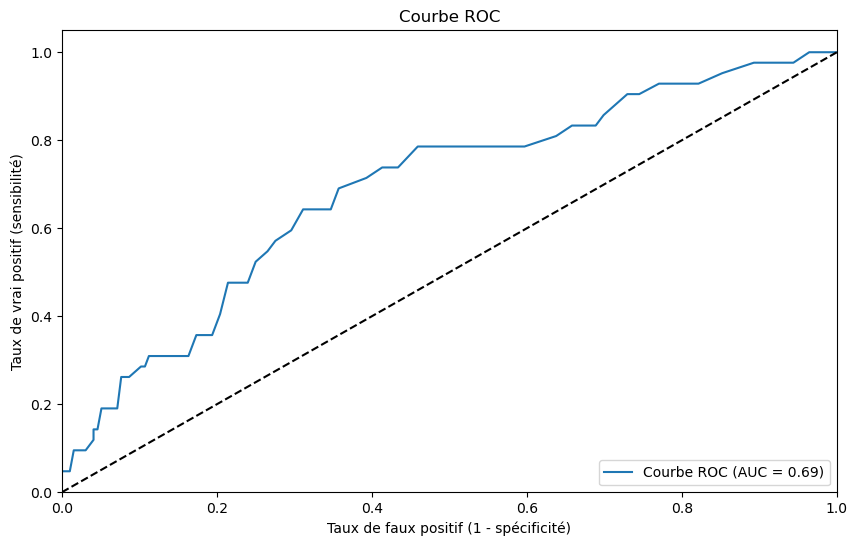

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random_forest) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [59]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_random_forest = roc_auc_score(y_test, y_pred_prob_random_forest)
score_auc_random_forest

0.6885325558794947

In [60]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision:", precision_random_forest)

Precision: 0.36363636363636365


In [61]:
from sklearn.metrics import recall_score

recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall:", recall_random_forest)

Recall: 0.2857142857142857


In [62]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-Score:", f1_reg_log)

F1-Score: 0.37209302325581395


In [63]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest) 
print("F1-Score:", f1_random_forest)

Modèle de forêts aléatoires 

Score AUC: 0.6885325558794947
F1-Score: 0.32


### I.2.4. Gradient Boosting

#### A) Construction du modèle

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de gradient boosting
etapes = ([("std_scaler", StandardScaler()),
              ("smote", SMOTE()),
              ("clf_boosting", GradientBoostingClassifier())
    ])

model_gradient_boosting = Pipeline(steps=etapes)

In [65]:
model_gradient_boosting.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_boosting', GradientBoostingClassifier())])

In [66]:
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

#### B) Mesure de la performance

In [67]:
score_gradient_boosting = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_gradient_boosting)

Le score du modèle est :  0.6596638655462185


In [68]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
print("La matrice de confusion est : \n", mat_conf_gradient_boosting)

La matrice de confusion est : 
 [[170  26]
 [ 32  10]]


Text(0.5, 427.9555555555555, 'valeur prédite')

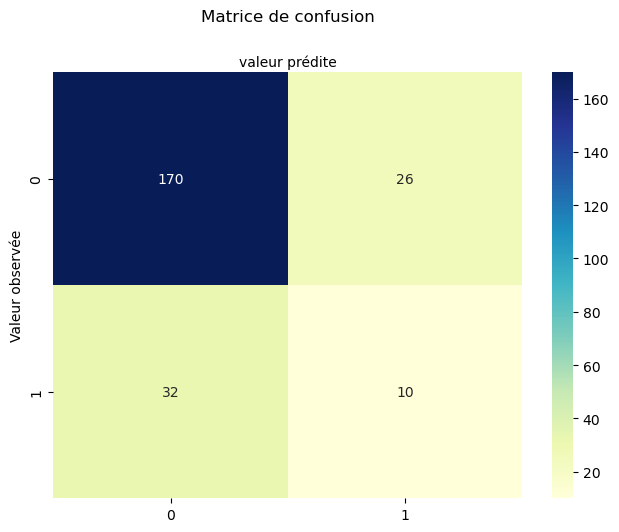

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_gradient_boosting), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

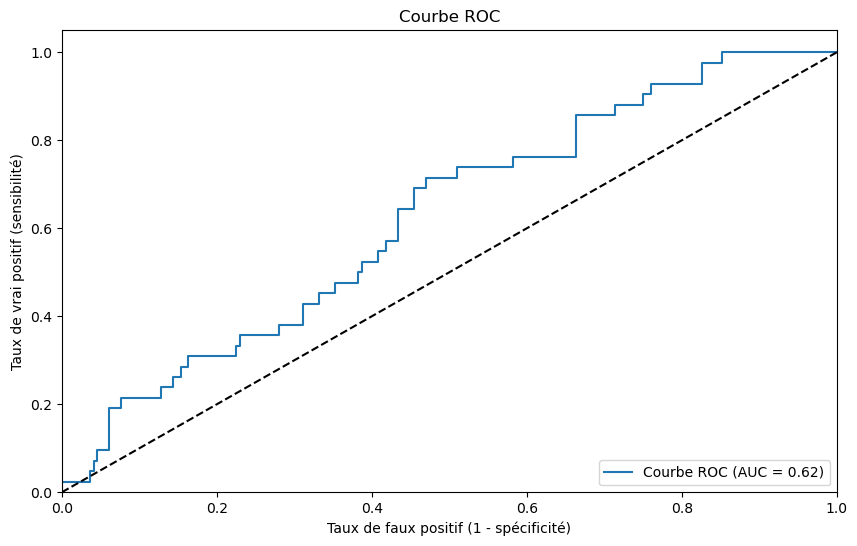

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_gradient_boosting = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gradient_boosting) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_gradient_boosting = roc_auc_score(y_test, y_pred_prob_gradient_boosting)
score_auc_gradient_boosting

0.6232993197278911

In [72]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
print("Precision:", precision_gradient_boosting)

Precision: 0.2777777777777778


In [73]:
from sklearn.metrics import recall_score

recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
print("Recall:", recall_gradient_boosting)

Recall: 0.23809523809523808


In [74]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

F1-Score: 0.25641025641025644


In [75]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting) 
print("F1-Score:", f1_gradient_boosting)

Modèle de gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.25641025641025644


### I.2.5. Régression ridge

#### A) Construction du modèle

In [76]:
# Régression ridge

from sklearn.linear_model import RidgeClassifier

etapes = ([
    ("std_scaler", StandardScaler()),
    ("smote", SMOTE()),
    ("clf_ridge", RidgeClassifier())
])

model_reg_ridge = Pipeline(steps=etapes)

In [77]:
model_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_ridge', RidgeClassifier())])

In [78]:
y_pred_reg_ridge = model_reg_ridge.predict(X_test)

#### B) Mesure de la performance

In [79]:
score_reg_ridge = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_ridge)

Le score du modèle est :  0.6596638655462185


In [80]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_ridge = confusion_matrix(y_test, y_pred_reg_ridge)
print("La matrice de confusion est : \n", mat_conf_reg_ridge)

La matrice de confusion est : 
 [[134  62]
 [ 17  25]]


Text(0.5, 427.9555555555555, 'valeur prédite')

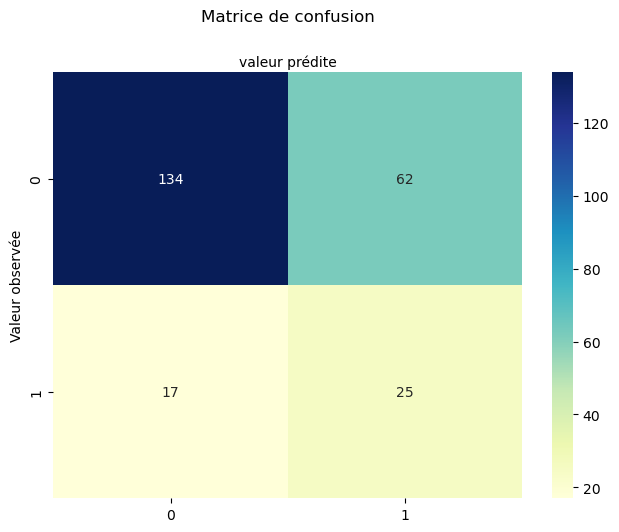

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

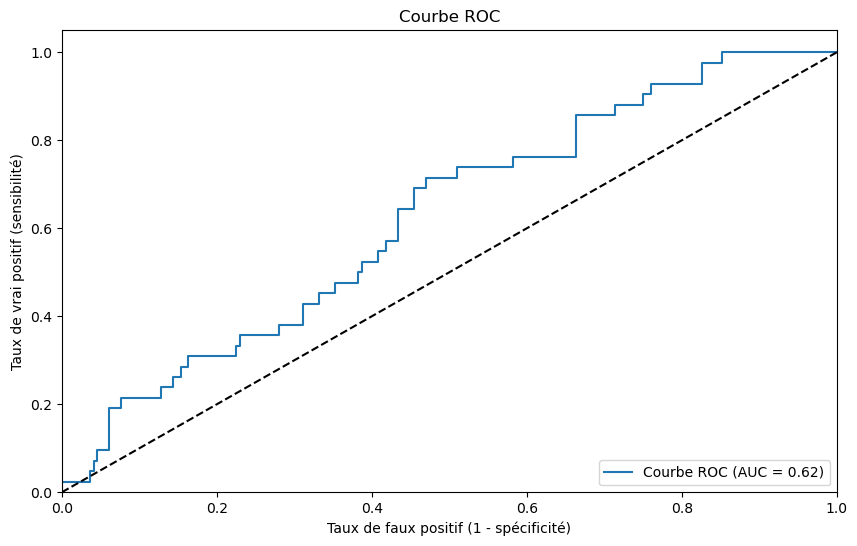

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_ridge = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_ridge) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [83]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_ridge = roc_auc_score(y_test, y_pred_prob_reg_ridge)
score_auc_reg_ridge

0.6232993197278911

In [84]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_ridge = precision_score(y_test, y_pred_reg_ridge)
print("Precision:", precision_reg_ridge)

Precision: 0.28735632183908044


In [85]:
from sklearn.metrics import recall_score

recall_reg_ridge = recall_score(y_test, y_pred_reg_ridge)
print("Recall:", recall_reg_ridge)

Recall: 0.5952380952380952


In [86]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_ridge = f1_score(y_test, y_pred_reg_ridge)
print("F1-Score:", f1_reg_ridge)

F1-Score: 0.38759689922480617


In [87]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_reg_ridge) 
print("F1-Score:", f1_reg_ridge)

Modèle de gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.38759689922480617


## I.3. Comparaison des modèles

In [88]:
# Comparaison des modèles

print("Régression logistique \n")
print("Score AUC:", score_auc_reg_log)
print("F1-Score:", f1_reg_log)

print("Forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest)
print("F1-Score:", f1_random_forest)

print("Gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

print("Régression ridge \n")
print("Score AUC:", score_auc_reg_ridge)
print("F1-Score:", f1_reg_ridge)

Régression logistique 

Score AUC: 0.6697035957240038
F1-Score: 0.37209302325581395
Forêts aléatoires 

Score AUC: 0.6885325558794947
F1-Score: 0.32
Gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.25641025641025644
Régression ridge 

Score AUC: 0.6232993197278911
F1-Score: 0.38759689922480617
